# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.18 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [ ]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [5]:
from collections import deque
import torch

### Now let's implement the DQN to train the agent to solve the environment
### Get yellow bananas and avoid blue bananas

### import the Agent class we have just implemented
from dqn.dqn_agent import Agent


### This Agent class contains a Q-Network and a replay buffer, as well as specifying the the learning process.
### Let's create an agent 
agent = Agent(state_size, action_size, seed=0)

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.1, eps_decay=0.995):
    """
    Deep Q-Learning
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of time steps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): the minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                       ### list containing scores from each episode
    scores_window = deque(maxlen=100) ### a container that only keeps most recent 100 scores
    eps = eps_start
    
    ### for each episode
    for episode_i in range(n_episodes):
        ### reset the environment
        env_info = env.reset(train_mode=True)[brain_name] 
        ### get the initial state
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            ### select an action
            action = agent.act(state, eps)
            ### execute the action in the environment
            env_info = env.step(action)[brain_name]
            ### get the next_state, reward, done
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            ### add this experience tuple to the buffer and
            ### if the number of such tuples in the replay buffer
            ### exceed the batch size, trigger the learning process (update the parameters in local Q-network)
            agent.step(state, action, reward, next_state, done)
            ### record the score
            score += reward
            ### prepare for next time step
            state = next_state
            ### check if it is done
            if done:
                break ### this episode is over
                
        ### reach here since the episode is over
        ### Before moving on to the next episode
        ### we need to save the resulting score
        scores.append(score)
        scores_window.append(score)
        ### decreasing the epsilon
        eps = max(eps_end, eps*eps_decay)
        ### print the progress
        print('\rEpisode {} \t Average Score: {:.2f}'.format(episode_i, np.mean(scores_window)), end="")
        if episode_i % 100 == 0:
            print('\rEpisode {} \t Average Score: {:.2f}'.format(episode_i, np.mean(scores_window)))
        ### termination point
        if np.mean(scores_window) >= 13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode_i-100, np.mean(scores_window)))
            ### save the model weights as the checkpoint
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint/project_checkpoint.pth')
            break
    ### out of the loop, return the scores
    return scores

In [6]:
scores = dqn()

Episode 0 	 Average Score: 0.00
Episode 100 	 Average Score: 1.17
Episode 200 	 Average Score: 4.92
Episode 300 	 Average Score: 8.38
Episode 400 	 Average Score: 10.40
Episode 488 	 Average Score: 13.02
Environment solved in 388 episodes!	Average Score: 13.02


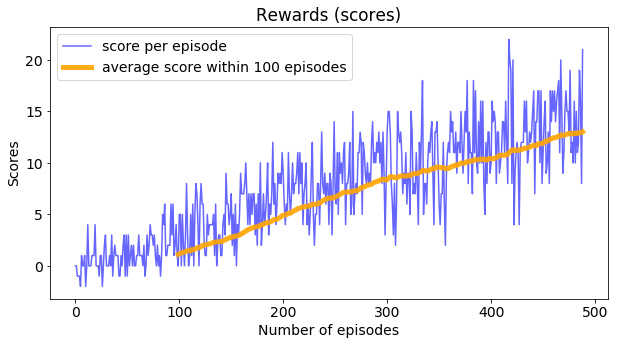

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

### plot the scores
fig = plt.figure(figsize=[10, 5])
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, c="blue", alpha=0.6)
### we also want to plot the scores within 100 episodes (scores window) 
### to demonstrate the trend during the training
scores_within_window = pd.Series(scores).rolling(100).mean()
plt.plot(scores_within_window, c="orange", linewidth=5, alpha=0.9)
plt.title('Rewards (scores)')
plt.ylabel('Scores')
plt.xlabel('Number of episodes')
ax.legend(["score per episode", "average score within 100 episodes"])

plt.show()

fig.savefig("images/episode_scores.jpg")